In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [2]:
X, y = mnist.data, mnist.target
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
import numpy as np

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# shuffle train data
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [6]:
from sklearn.linear_model import SGDClassifier

some_digit = X[36000]

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_scaled, y_train)
sgd_clf.predict([some_digit])

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([3.])

In [7]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[  10616.1760129 ,  -79212.03636027,  -79312.19867957,
          13317.99830615, -100913.18072924,  -23125.3131567 ,
        -114564.84356297,  -75732.44365661, -105626.38060503,
        -119630.34708078]])

In [8]:
 np.argmax(some_digit_scores)

3

In [9]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [10]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91066787, 0.91064553, 0.91008651])

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5735,    3,   24,    8,   11,   42,   44,   10,   41,    5],
       [   1, 6497,   45,   27,    6,   35,    6,    7,  106,   12],
       [  60,   43, 5316,  105,   88,   25,   89,   55,  163,   14],
       [  44,   40,  139, 5356,    3,  225,   35,   52,  132,  105],
       [  20,   29,   40,    8, 5390,    9,   46,   34,   78,  188],
       [  74,   40,   35,  189,   71, 4607,  112,   27,  169,   97],
       [  39,   26,   46,    2,   46,   85, 5617,    7,   50,    0],
       [  24,   25,   75,   28,   62,   11,    6, 5765,   14,  255],
       [  53,  162,   65,  153,   16,  161,   58,   21, 5022,  140],
       [  42,   37,   27,   83,  167,   40,    2,  177,   77, 5297]])

In [12]:
import  matplotlib.pyplot as plt 

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

<Figure size 480x480 with 1 Axes>

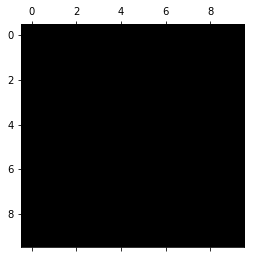

In [13]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()